# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E   A   D   DMG     H    MIT    GAME
0   0   7   3   6  5933  1068   6199  DEFEAT
    1   7   0  10  3601   747      0  DEFEAT
    2   9   1   6  4352     0      0  DEFEAT
    3   7   7   2  2332  6325      0  DEFEAT
    4   6   4   2  3410  5979    606  DEFEAT
...    ..  ..  ..   ...   ...    ...     ...
443 5  14   0   8  9148     0  13124  DEFEAT
    6  12   4   7  5074   239      0  DEFEAT
    7  10   0  10  6965     0   1451  DEFEAT
    8   5  11   4  1155  7813    788  DEFEAT
    9   4  11   5  2398  8825   2105  DEFEAT

[4440 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4440 entries, (0, 0) to (443, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       4440 non-null   int64 
 1   A       4440 non-null   int64 
 2   D       4440 non-null   int64 
 3   DMG     4440 non-null   int64 
 4   H       4440 non-null   int64 
 5   MIT     4440 non-null   int64 
 6   GAME    4440 non-null   object
dtypes: int64(6), object(1)
memory usage: 275.9+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,4440.000000,4440.000000,4440.000000,4440.000000,4440.000000,4440.000000
mean,13.590766,7.168694,6.362838,6152.650450,3834.526577,2357.307658
std,9.578307,8.143656,3.880000,4316.936088,5401.986143,4597.471894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,4.000000,2710.500000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5391.500000,701.000000,334.000000
75%,20.000000,11.000000,9.000000,9029.000000,7350.500000,1930.250000
max,58.000000,54.000000,21.000000,26666.000000,130174.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
tank = scoreboards[::players]
damage = pd.concat([scoreboards[1::players], scoreboards[2::players]])
support = pd.concat([scoreboards[3::players], scoreboards[4::players]])

그림 저장:tank_hist


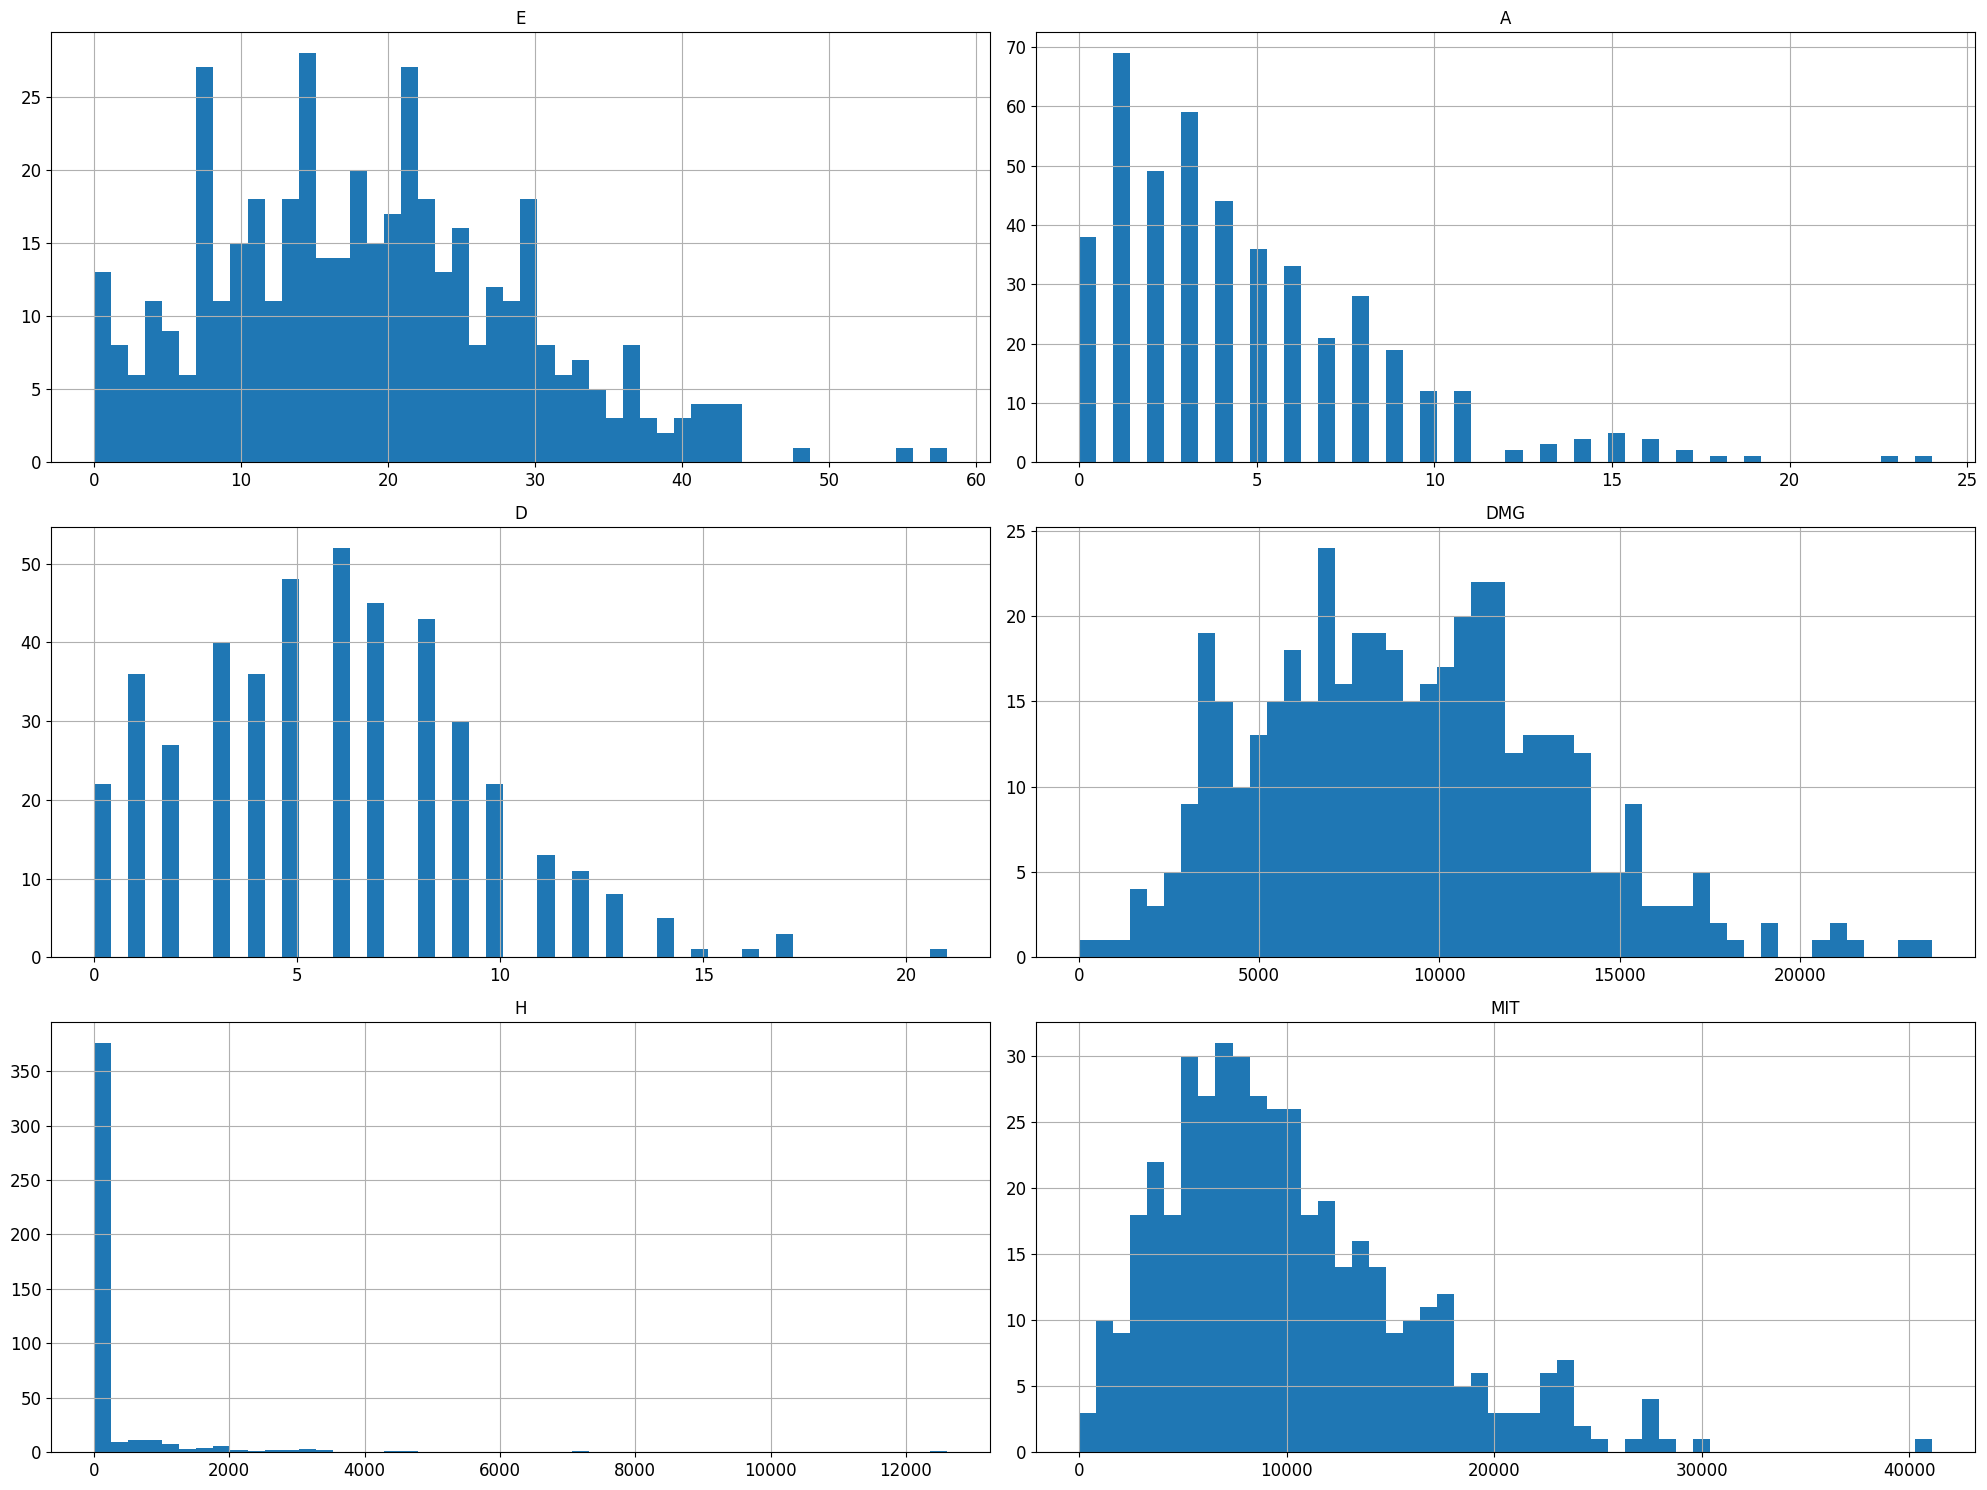

In [6]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


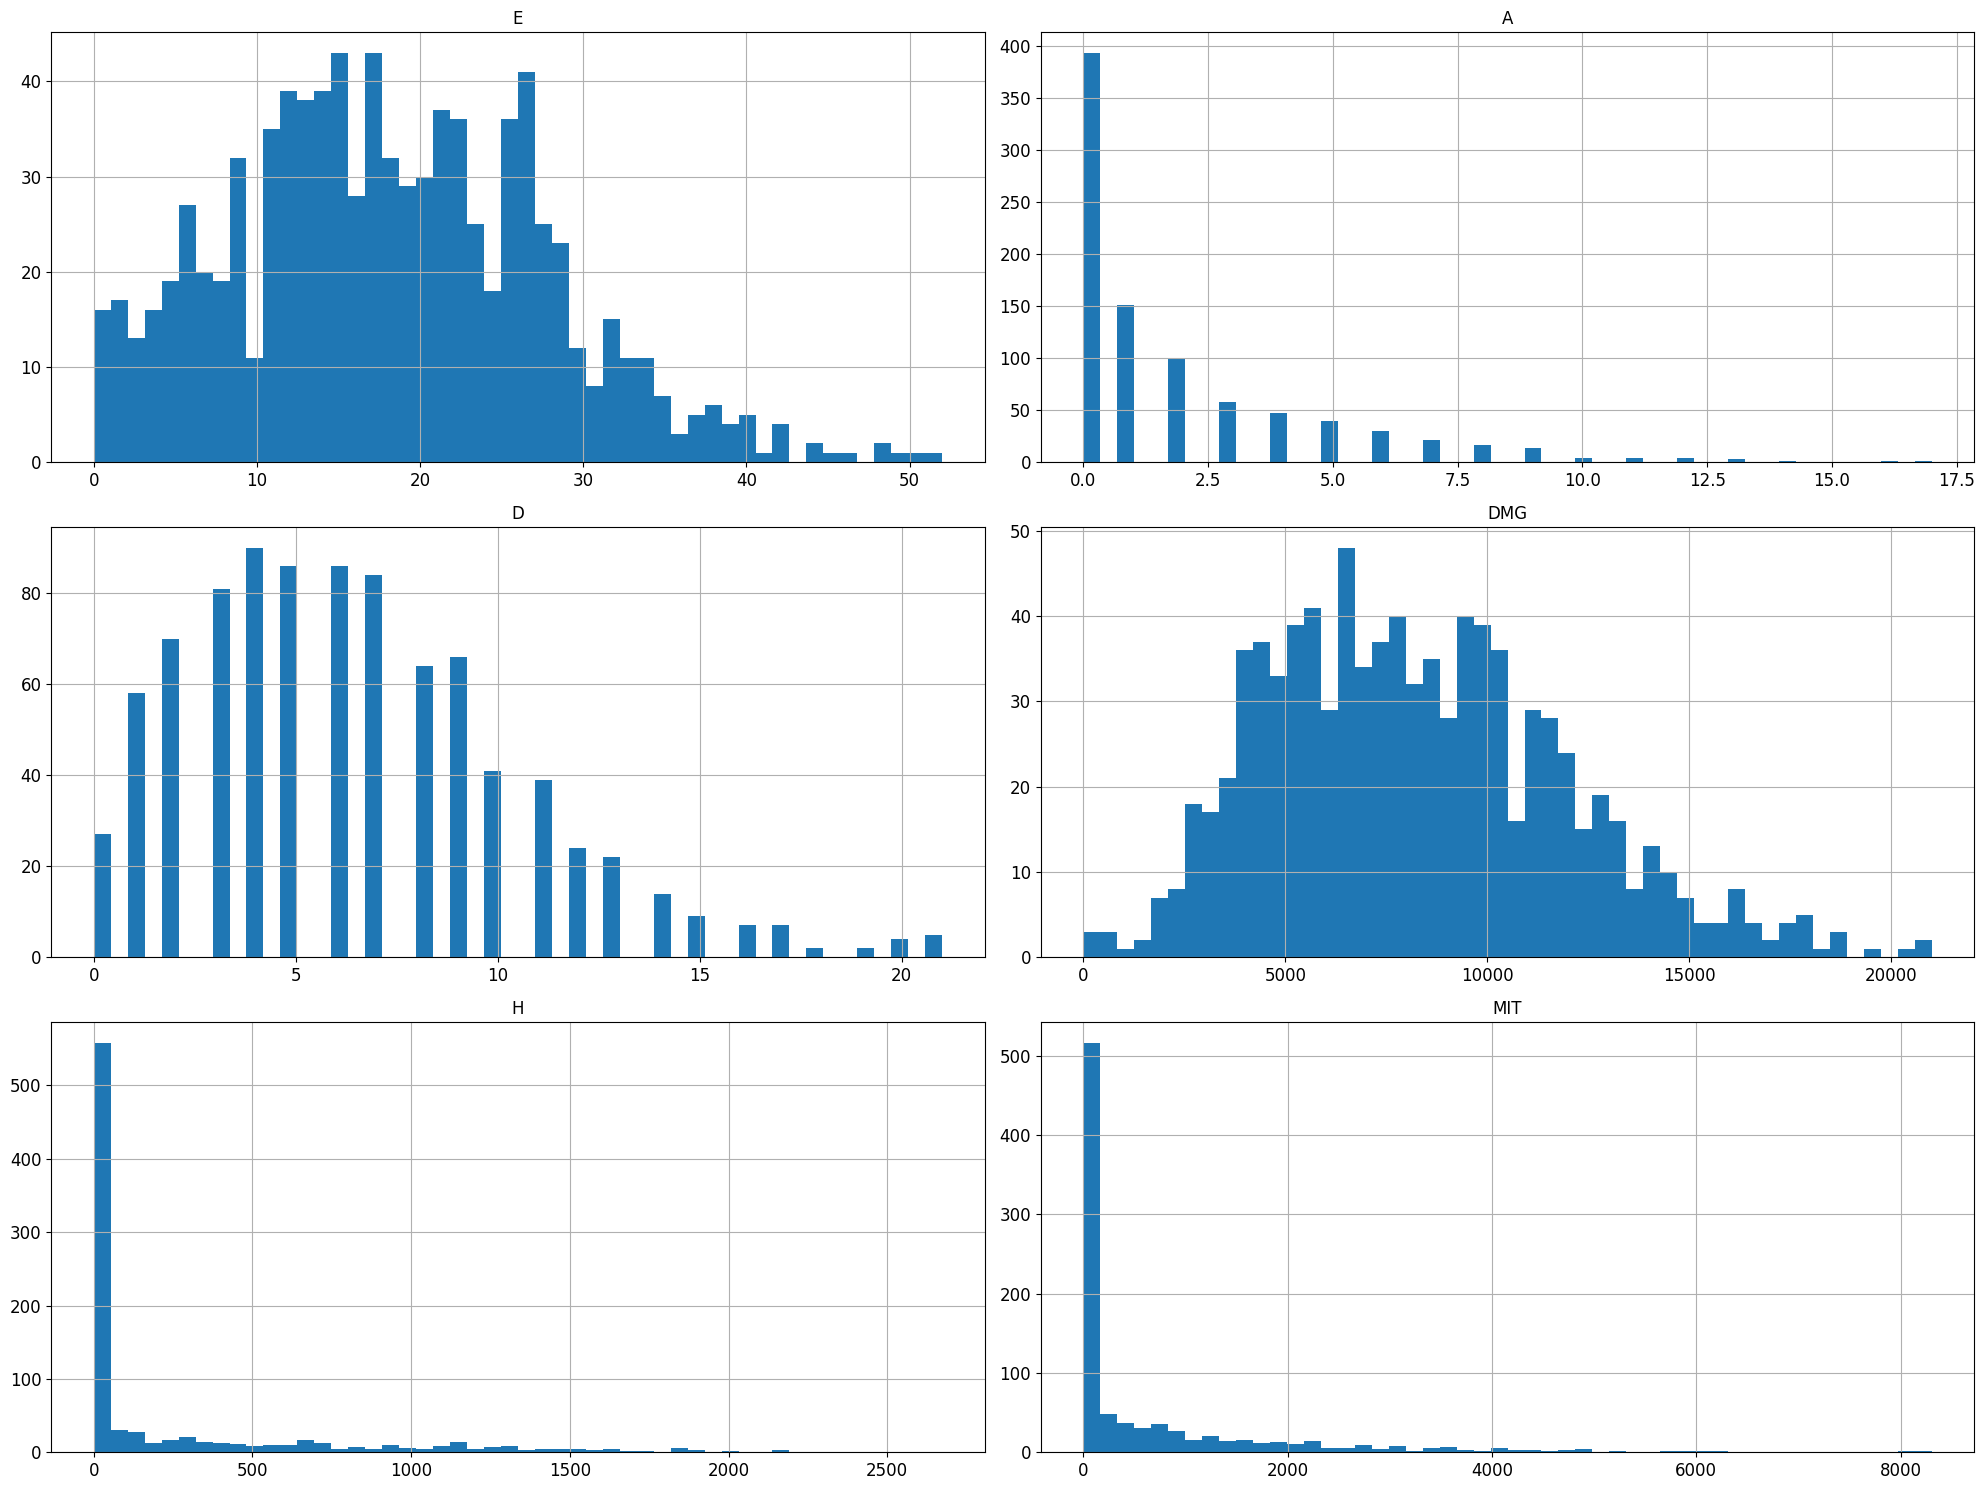

In [7]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


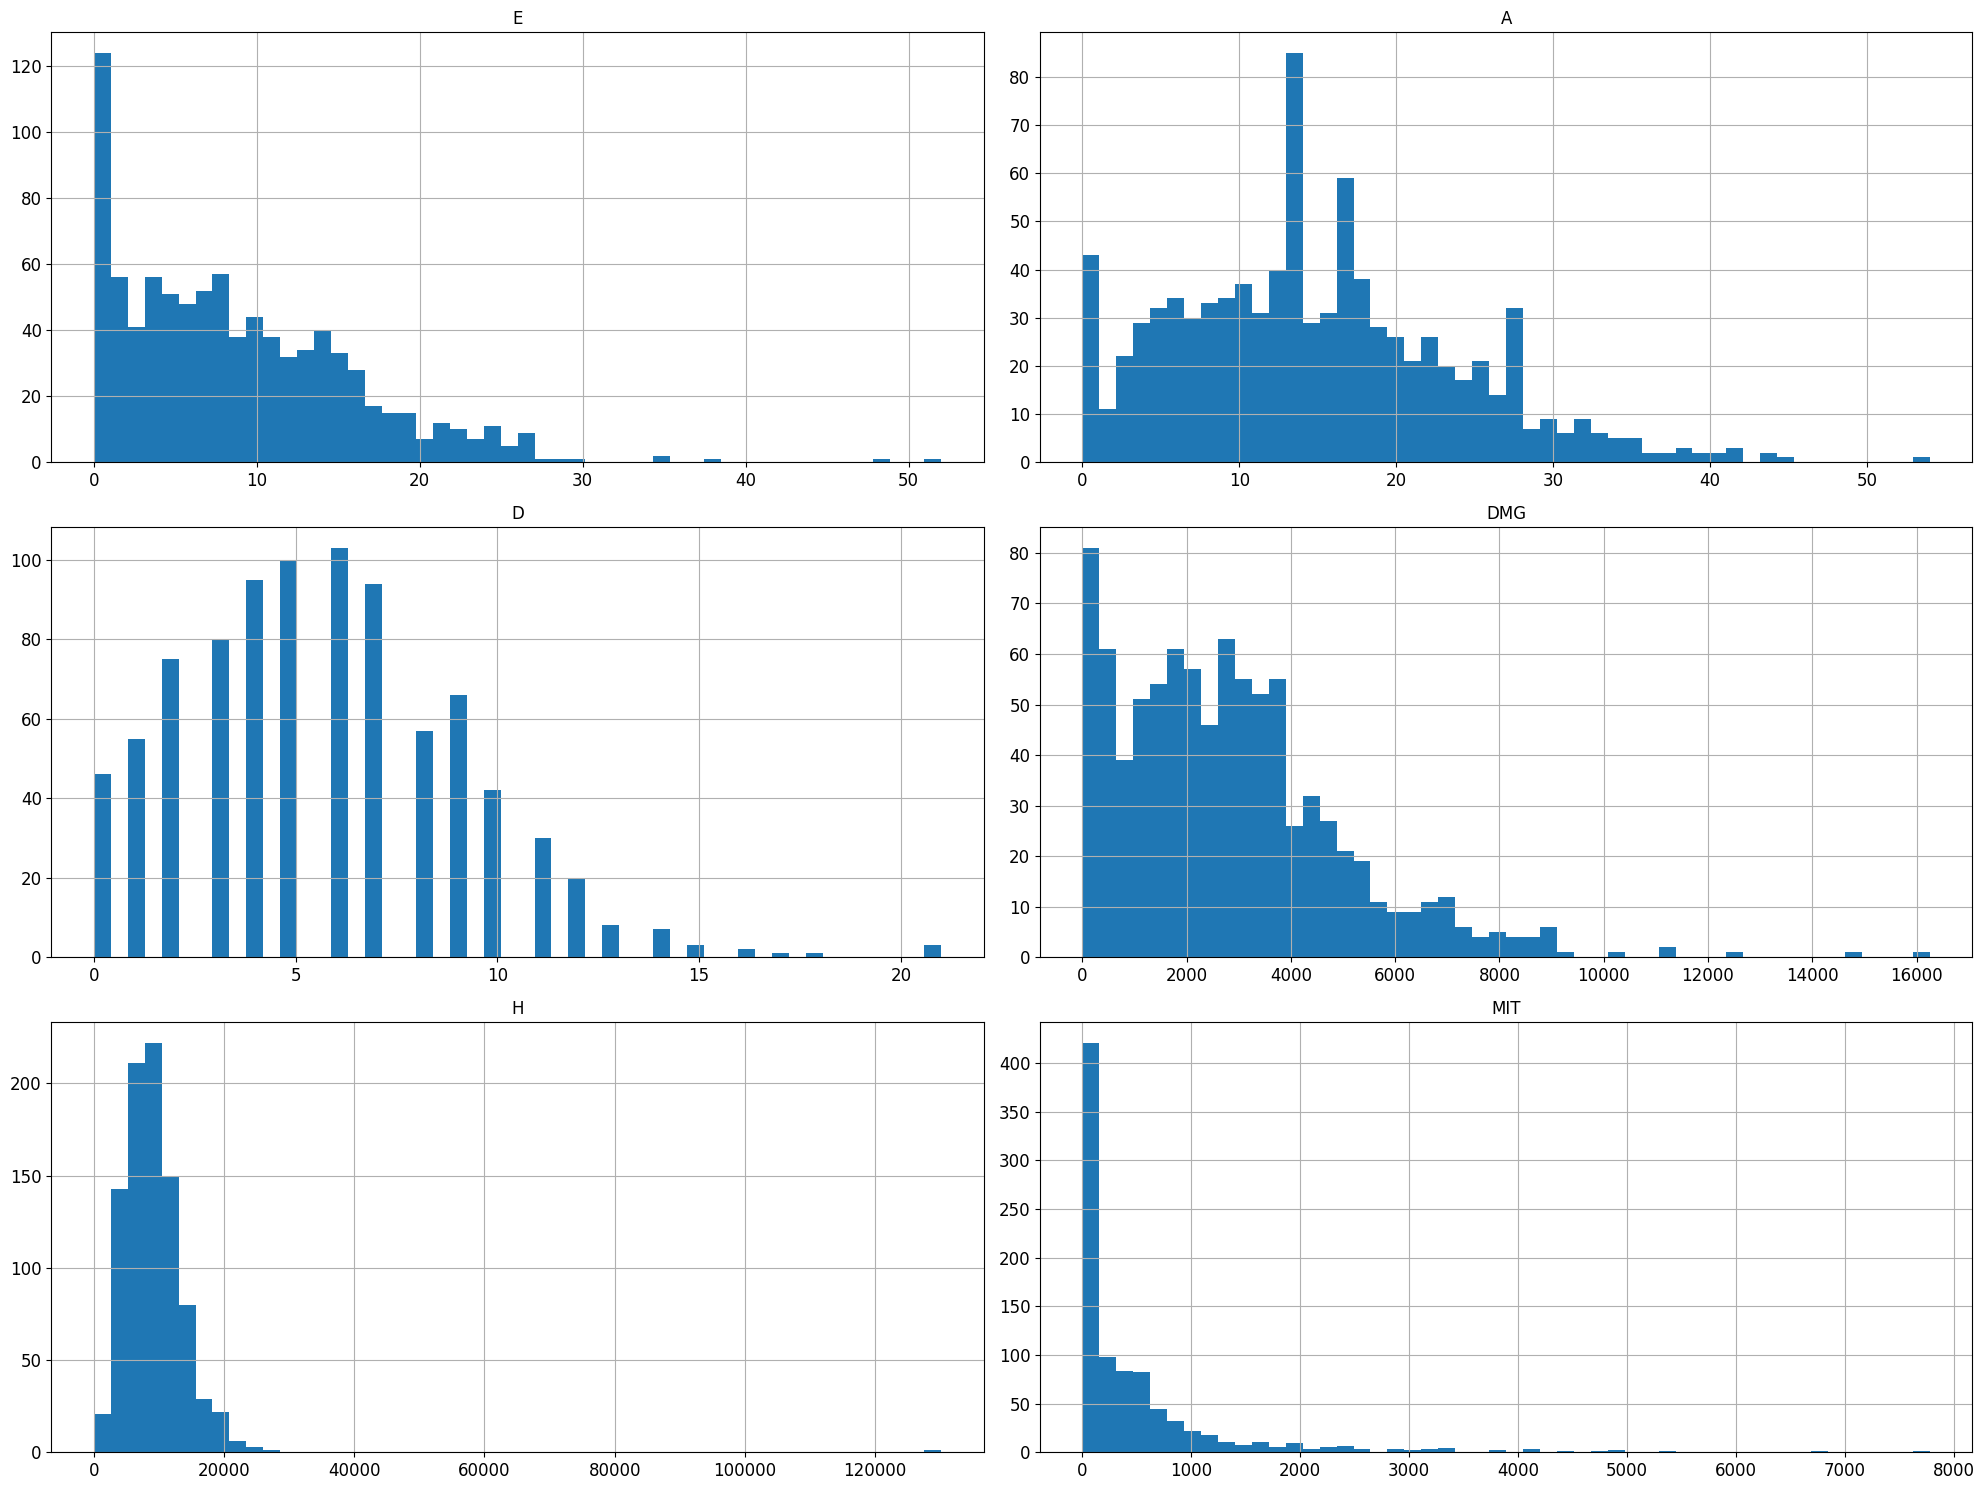

In [8]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [9]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A   D    DMG      H   MIT     GAME
224 0  23   7   7  11318      0  9540  VICTORY
    1  27   8   8  11578      0  1905  VICTORY
    2  18   6   5   7477      0     0  VICTORY
    3  20  16   3   3584   7548     0  VICTORY
    4  21  18   6   3801   8909   449  VICTORY
...    ..  ..  ..    ...    ...   ...      ...
269 5  22   4   8  15591      0  9981   DEFEAT
    6  21   1  12  12451    251   207   DEFEAT
    7  20   4  10  13899    305   186   DEFEAT
    8   3  13  11   1025   9787   470   DEFEAT
    9  13  18   8   6025  16232  1267   DEFEAT

[4440 rows x 7 columns]

In [10]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [11]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
224 0  0.396552  0.129630  0.333333  0.424436  0.000000  0.227962
    1  0.465517  0.148148  0.380952  0.434186  0.000000  0.045521
    2  0.310345  0.111111  0.238095  0.280395  0.000000  0.000000
    3  0.344828  0.296296  0.142857  0.134403  0.057984  0.000000
    4  0.362069  0.333333  0.285714  0.142541  0.068439  0.010729
...         ...       ...       ...       ...       ...       ...
269 5  0.379310  0.074074  0.380952  0.584677  0.000000  0.238500
    6  0.362069  0.018519  0.571429  0.466924  0.001928  0.004946
    7  0.344828  0.074074  0.476190  0.521226  0.002343  0.004445
    8  0.051724  0.240741  0.523810  0.038438  0.075184  0.011231
    9  0.224138  0.333333  0.380952  0.225943  0.124695  0.030276

[4440 rows x 6 columns]

In [12]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(444, 60)
(444,)


In [13]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.88764045, 0.87640449, 0.94382022, 0.8988764 , 0.88636364])

In [14]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.52808989, 0.53932584, 0.52808989, 0.53932584, 0.59090909])

In [15]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.85393258, 0.85393258, 0.8988764 , 0.87640449, 0.92045455])

In [16]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(RidgeClassifierCV(), 0.9077119509703779),
 (NuSVC(), 0.9077119509703779),
 (RandomForestClassifier(n_jobs=-1), 0.9076098059244128),
 (LogisticRegression(n_jobs=-1), 0.9054647599591419),
 (SVC(), 0.9054647599591419),
 (NearestCentroid(), 0.9009703779366701),
 (SGDClassifier(n_jobs=-1), 0.8987231869254341),
 (LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.8986210418794689),
 (LinearSVC(dual='auto'), 0.8965015321756896),
 (RidgeClassifier(), 0.8964504596527068),
 (ExtraTreesClassifier(n_jobs=-1), 0.8964249233912156),
 (KNeighborsClassifier(n_jobs=-1), 0.885137895812053),
 (MLPClassifier(max_iter=3200), 0.8806945863125637),
 (GradientBoostingClassifier(), 0.8783963227783452),
 (HistGradientBoostingClassifier(), 0.8783963227783452),
 (AdaBoostClassifier(), 0.8761491317671093),
 (BaggingClassifier(n_jobs=-1), 0.8739530132788559),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8716802860061288),
 (Perceptron(n_jobs=-1), 0.8560010214504598),
 (DecisionTreeClassifier(), 0.8197650663942799),
 

In [17]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [18]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        print(estimator)
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances[tanks] = importances[tanks].sum(0) / 2
        importances[damages] = importances[damages].sum(0) / 4
        importances[supports] = importances[supports].sum(0) / 4
        joblib.dump(importances, 'importances.joblib')

        importances_tanks = importances[tanks].sum(0)
        importances_damages = importances[damages].sum(0) / 2
        importances_supports = importances[supports].sum(0) / 2

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('\n**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tanks, titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damages, titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 지원 특성 중요도**')
        for importance, title in sorted(zip(importances_supports, titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tanks.sum(), importances_damages.sum(), importances_supports.sum()), ('돌격', '공격', '지원')
                ),
                reverse=True
        ):
            print(f'{title}: {importance * 100:.0f}%')

        break

RandomForestClassifier(n_jobs=-1)

**특성 중요도**
처치: 34%
죽음: 27%
도움: 20%
피해: 9%
치유: 6%
경감: 5%

**1인 돌격 특성 중요도**
처치: 11%
죽음: 10%
도움: 4%
피해: 2%
경감: 1%
치유: 0%

**1인 공격 특성 중요도**
처치: 8%
죽음: 4%
피해: 2%
도움: 1%
치유: 1%
경감: 1%

**1인 지원 특성 중요도**
도움: 7%
죽음: 5%
처치: 3%
치유: 2%
피해: 1%
경감: 1%

**1인 역할 중요도**
돌격: 28.76%
지원: 18.91%
공격: 16.71%


In [19]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -10):
    defeat_i = defeat[i:i + 10]
    print(f'DEFEAT ({i // 10 + 1})')
    print(defeat_i)
    
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.1f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.1f}', end='')
    print('\n')

DEFEAT (209)
       E   A   D    DMG      H    MIT     GAME
2080  21   7   9   8165      0  23241   DEFEAT
2081  22   6   8  10047      0   4949   DEFEAT
2082  26   0  16   8501      0   1536   DEFEAT
2083  14   9  13   4340  10876    799   DEFEAT
2084  11  17  14   3095  12958   1084   DEFEAT
2085  41  12   8  15843      0   7390  VICTORY
2086  20   0   8   9088   1138     49  VICTORY
2087  30   7  11   9016      0    952  VICTORY
2088  29  16  10   8232   7965      0  VICTORY
2089  16  10   7   3674   8869    186  VICTORY
TEAM 1: 0.8 1.0 0.9 0.8 0.9
TEAM 2: 1.2 1.0 1.1 1.3 1.1

DEFEAT (208)
       E   A  D   DMG     H    MIT     GAME
2070  10   1  5  6631     0  15580   DEFEAT
2071  15   2  5  5697   835      0   DEFEAT
2072  14   0  4  5679     0    967   DEFEAT
2073   6  13  5  3649  5531      0   DEFEAT
2074   4   7  5   768  5328     42   DEFEAT
2075  13   4  4  3881     0   7269  VICTORY
2076  13   1  6  7189     0    144  VICTORY
2077  15   2  4  6656     0    412  VICTORY
2078

In [20]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -10):
    victory_i = victory[i:i + 10]
    print(f'VICTORY ({i // 10 + 1})')
    print(victory_i)
    
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.1f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.1f}', end='')
    print('\n')

VICTORY (235)
       E   A   D   DMG     H    MIT     GAME
2340  23   2   1  9292     0   8391  VICTORY
2341  21   2   5  9666     0    779  VICTORY
2342  22   0   6  6323     0    214  VICTORY
2343  16  10   6  3073  8706    567  VICTORY
2344  11  17   5  1784  7704    223  VICTORY
2345  14   0   8  9148     0  13124   DEFEAT
2346  12   4   7  5074   239      0   DEFEAT
2347  10   0  10  6965     0   1451   DEFEAT
2348   5  11   4  1155  7813    788   DEFEAT
2349   4  11   5  2398  8825   2105   DEFEAT
TEAM 1: 1.2 1.2 1.2 1.0 1.1
TEAM 2: 0.8 0.9 0.7 1.0 0.9

VICTORY (234)
       E   A   D    DMG      H    MIT     GAME
2330  28   1   4  12468      0  23212  VICTORY
2331  23   6   7  11259   1122      0  VICTORY
2332  24   0  12   6648      0    742  VICTORY
2333  25  27   6   7287  10673      0  VICTORY
2334   8  21   7   3655   8008   1528  VICTORY
2335  19  11   6  10165      0  12762   DEFEAT
2336  24   2  10  10793      0    324   DEFEAT
2337  17   2  12   6717    392    704   DEFE

In [21]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(300, 'relu', input_shape=(total_features,)))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

2023-11-28 04:52:58.380331: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 04:52:59.557591: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-28 04:52:59.571579: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-28 04:52:59.571900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been bu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 48501 (189.46 KB)
Trainable params: 48501 (189.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', ['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256


2023-11-28 04:53:00.415881: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-28 04:53:00.437732: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7cb0c09a20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-28 04:53:00.437768: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-11-28 04:53:00.455996: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-11-28 04:53:00.464876: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-28 04:53:00.502321: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 [==============================] - 1s 16ms/step - loss: 0.7160 - accuracy: 0.4745 - val_loss: 0.7145 - val_accuracy: 0.4505
Epoch 2/256
11/11 [==============================] - 0s 6ms/step - loss: 0.7061 - accuracy: 0.4745 - val_loss: 0.7031 - val_accuracy: 0.4414
Epoch 3/256
11/11 [==============================] - 0s 6ms/step - loss: 0.6968 - accuracy: 0.4805 - val_loss: 0.6936 - val_accuracy: 0.4865
Epoch 4/256
11/11 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.5405 - val_loss: 0.6857 - val_accuracy: 0.6126
Epoch 5/256
11/11 [==============================] - 0s 6ms/step - loss: 0.6827 - accuracy: 0.6607 - val_loss: 0.6785 - val_accuracy: 0.7838
Epoch 6/256
11/11 [==============================] - 0s 7ms/step - loss: 0.6766 - accuracy: 0.7808 - val_loss: 0.6723 - val_accuracy: 0.8739
Epoch 7/256
11/11 [==============================] - 0s 6ms/step - loss: 0.6709 - accuracy: 0.8288 - val_loss: 0.6658 - val_accuracy: 0.8649
Epoch 8/256
11/11 [=====

(0.23893214762210846, 0.9189189076423645)